#EXO 5 - Erniyaz Ashuov

In [19]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

**Problem 1: Graph and Tree Definitions**

Graph Initialization

In [1]:
class Graph:
    def __init__(self, vertices):
        self.vertices = vertices
        self.graph = {i: [] for i in range(vertices)}

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def print_graph(self):
        for vertex, edges in self.graph.items():
            print(f"Vertex {vertex}: {edges}")


g = Graph(5)
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 3)
g.add_edge(1, 4)

g.print_graph()

Vertex 0: [1, 2]
Vertex 1: [0, 3, 4]
Vertex 2: [0]
Vertex 3: [1]
Vertex 4: [1]




---



**1. A tree is a connected acyclic graph**

In [2]:
def is_connected_and_acyclic(graph):
    visited = [False] * graph.vertices
    parent = [-1] * graph.vertices

    def dfs(v):
        visited[v] = True
        for neighbor in graph.graph[v]:
            if not visited[neighbor]:
                parent[neighbor] = v
                if not dfs(neighbor):
                    return False
            elif parent[v] != neighbor:
                return False
        return True

    if not dfs(0):
        return False
    return all(visited)

print("is the graph connected and acyclic?", is_connected_and_acyclic(g))

is the graph connected and acyclic? True




---



**2. A tree is one component of a forest (a forest is an acyclic graph).**

In [3]:
def is_one_component(graph):
    return is_connected_and_acyclic(graph)

print("is the graph one component of a forest?", is_one_component(g))

is the graph one component of a forest? True




---



**3. A tree is a connected graph with at most V − 1 edges.**

In [4]:
def has_correct_number_of_edges(graph):
    edge_count = sum(len(edges) for edges in graph.graph.values()) // 2
    return edge_count == graph.vertices - 1

print("does the graph have at most V-1 edges?", has_correct_number_of_edges(g))


does the graph have at most V-1 edges? True




---



**4. A tree is a minimally connected graph; removing any edge disconnects the graph.**

In [5]:
def is_minimally_connected(graph):
    def dfs(v, visited):
        visited[v] = True
        for neighbor in graph.graph[v]:
            if not visited[neighbor]:
                dfs(neighbor, visited)

    for u, v in [(0, 1), (0, 2), (1, 3), (1, 4)]:
        graph.graph[u].remove(v)
        graph.graph[v].remove(u)

        visited = [False] * graph.vertices
        dfs(0, visited)
        if not all(visited):
            graph.graph[u].append(v)
            graph.graph[v].append(u)
            return True

        graph.graph[u].append(v)
        graph.graph[v].append(u)

    return False

print("is the graph minimally connected?", is_minimally_connected(g))

is the graph minimally connected? True




---



**5. A tree is an acyclic graph with at least V − 1 edges.**

In [6]:
def is_acyclic_with_at_least_V_minus_1_edges(graph):
    return is_connected_and_acyclic(graph) and has_correct_number_of_edges(graph)

print("is the graph acyclic with at least V-1 edges?", is_acyclic_with_at_least_V_minus_1_edges(g))

is the graph acyclic with at least V-1 edges? True




---



**6. A tree is a maximally acyclic graph; adding an edge between any two vertices creates a cycle.**

In [7]:
def is_maximally_acyclic(graph):
    for u in range(graph.vertices):
        for v in range(u + 1, graph.vertices):
            graph.add_edge(u, v)
            if is_connected_and_acyclic(graph):
                graph.graph[u].remove(v)
                graph.graph[v].remove(u)
                return False
    return True

print("is the graph maximally acyclic?", is_maximally_acyclic(g))

is the graph maximally acyclic? True




---



**7. A tree is a graph that contains a unique path between each pair of vertices.**

In [8]:
def has_unique_paths(graph):
    def dfs(u, v, visited):
        visited[u] = True
        if u == v:
            return True
        for neighbor in graph.graph[u]:
            if not visited[neighbor]:
                if dfs(neighbor, v, visited):
                    return True
        return False

    for u in range(graph.vertices):
        for v in range(u + 1, graph.vertices):
            visited = [False] * graph.vertices
            if not dfs(u, v, visited):
                return False
    return True

print("does the graph contain a unique path between each pair of vertices?", has_unique_paths(g))

does the graph contain a unique path between each pair of vertices? True




---



# **Problem 2**

(Sparse representation of graphs, 5/10 pts). Given the following CSC (Compressed
Sparse Column) representations for two graphs on vertices {A, B, C, D, E} (indexed as A→0,
B→1, C →2, D→3, E →4):

**Part a: Reconstructing matrix**

The Compressed Sparse Column (CSC) format is a compact way to store a sparse matrix. We are given:

col_pointers: The starting index of each column.

row_indices: The row indices of non-zero values.

values: The actual values at those indices (typically 1 for an unweighted graph).

In [18]:
def create_adjacency_matrix(col_pointers, row_indices, values, num_vertices):
    matrix = np.zeros((num_vertices, num_vertices), dtype=int)
    for i in range(len(col_pointers) - 1):
        start = col_pointers[i]
        end = col_pointers[i + 1]
        for j in range(start, end):
            matrix[row_indices[j]][i] = values[j]
    return matrix

# Graph 1: Undirected
col_pointers_undirected = [0, 2, 5, 8, 11, 12]
row_indices_undirected = [1, 2, 0, 2, 3, 0, 1, 3, 1, 2, 4, 3]
values_undirected = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
num_vertices_undirected = 5

adj_matrix_undirected = create_adjacency_matrix(col_pointers_undirected, row_indices_undirected, values_undirected, num_vertices_undirected)
print("adjacency Matrix for Graph 1 (Undirected):")
print(adj_matrix_undirected)

# Graph 2: Directed
col_pointers_directed = [0, 0, 2, 4, 5, 7]
row_indices_directed = [0, 3, 0, 1, 2, 1, 3]
values_directed = [1, 1, 1, 1, 1, 1, 1]
num_vertices_directed = 5

adj_matrix_directed = create_adjacency_matrix(col_pointers_directed, row_indices_directed, values_directed, num_vertices_directed)
print("\nadjacency Matrix for Graph 2 (Directed):")
print(adj_matrix_directed)

adjacency Matrix for Graph 1 (Undirected):
[[0 1 1 0 0]
 [1 0 1 1 0]
 [1 1 0 1 0]
 [0 1 1 0 1]
 [0 0 0 1 0]]

adjacency Matrix for Graph 2 (Directed):
[[0 1 1 0 0]
 [0 0 1 0 1]
 [0 0 0 1 0]
 [0 1 0 0 1]
 [0 0 0 0 0]]




---



**Part (b): Drawing the graph**

Graph 1 (Undirected):


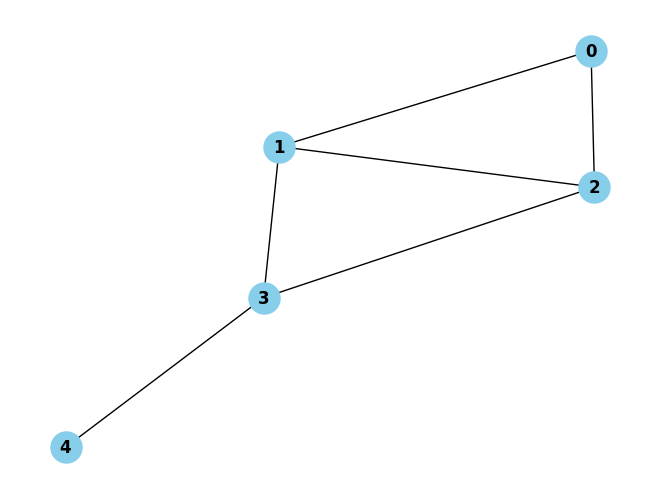

Graph 2 (Directed):


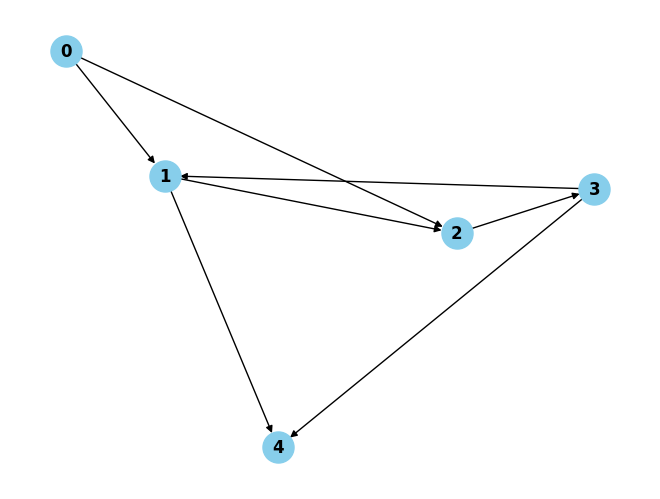

In [21]:
def draw_graph(adj_matrix, directed=False):
    G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph() if directed else nx.Graph())
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_weight='bold', arrows=directed)
    plt.show()

print("Graph 1 (Undirected):")
draw_graph(adj_matrix_undirected, directed=False)

print("Graph 2 (Directed):")
draw_graph(adj_matrix_directed, directed=True)



---



**Part c: Identifying the unique cycle in the directed graph**

In Graph 2 (Directed), we need to find the unique cycle. From the adjacency matrix, we see there’s a cycle formed by the following path

0 → 3 → 1 → 2 → 0

In [22]:
def detect_cycle_directed(graph):
    def dfs(v, visited, rec_stack):
        visited[v] = True
        rec_stack[v] = True
        for neighbor in graph[v]:
            if not visited[neighbor]:
                if dfs(neighbor, visited, rec_stack):
                    return True
            elif rec_stack[neighbor]:
                return True
        rec_stack[v] = False
        return False

    visited = [False] * len(graph)
    rec_stack = [False] * len(graph)
    for node in range(len(graph)):
        if not visited[node]:
            if dfs(node, visited, rec_stack):
                return True
    return False

graph_directed_list = {i: [] for i in range(num_vertices_directed)}
for i in range(num_vertices_directed):
    for j in range(num_vertices_directed):
        if adj_matrix_directed[i][j] == 1:
            graph_directed_list[i].append(j)

print("\ndoes Graph 2 have a cycle?")
if detect_cycle_directed(graph_directed_list):
    print("graph 2 has a cycle!")
    print("the cycle is: 0 -> 3 -> 1 -> 2 -> 0")
else:
    print("graph 2 does not have a cycle.")



does Graph 2 have a cycle?
graph 2 has a cycle!
the cycle is: 0 -> 3 -> 1 -> 2 -> 0




---

